In [35]:
import os, sys
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV



## Read Data

In [60]:
df_raw = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [61]:
df_raw.head()

,listing_id,title,make,model,description,manufactured,original_reg_date,reg_date,type_of_vehicle,category,...,mileage,omv,arf,opc_scheme,lifespan,eco_category,features,accessories,indicative_price,price
0,1292132,Land Rover Range Rover Velar 3.0A Si6 R-Dynami...,land rover,range,"1 owner, no repairs needed! it looks great, in...",2018.0,NaN,08-mar-2018,suv,parf car,...,96000.0,88906.0,132031.0,NaN,NaN,uncategorized,3l supercharged v6 p380 engine at 375bhp/450nm...,"2 x massage/memory/cooling & warmer seat, rear...",NaN,193788.0
1,1294696,Mercedes-Benz C-Class C200 Sport Premium Sunroof,mercedes-benz,c200,rare beautiful white c200 sport premium sunroo...,2017.0,NaN,28-dec-2017,luxury sedan,"parf car, premium ad car",...,85680.0,40678.0,43950.0,NaN,NaN,uncategorized,"2.0l 4 cylinders inline turbocharged engine, p...","multi function steering, electric tailgate, re...",NaN,96800.0
2,1311717,Honda Odyssey 2.4A (COE till 09/2027),honda,odyssey,comes with warranty. full service done.,2007.0,NaN,19-sep-2007,mpv,"coe car, premium ad car, low mileage car",...,138000.0,27994.0,30794.0,NaN,NaN,uncategorized,"2.4l k24a 4 cylinders inline dohc i-vtec, 5 sp...","cruise control, touchscreen audio, reverse cam...",NaN,39800.0
3,1310068,Toyota Corolla Altis 1.6A (COE till 12/2028),toyota,altis,0,2008.0,NaN,15-dec-2008,mid-sized sedan,"coe car, premium ad car",...,160000.0,16084.0,16084.0,NaN,NaN,uncategorized,super fuel efficient 1.6l 16 valves dohc vvt-i...,"leather seats, pioneer dvd audio system with r...",NaN,44800.0
4,1325280,Lexus GS300 (COE till 06/2026),lexus,gs,wear and tear done up. well maintained and reg...,2006.0,NaN,22-dec-2006,luxury sedan,"coe car, premium ad car",...,183000.0,50414.0,55456.0,NaN,NaN,uncategorized,"powerful 3.0l v6 engine, 227bhp, 6 speed , key...",premium upholstery electric seats. memory seat...,NaN,25800.0


In [62]:
df_test.head()

,listing_id,title,make,model,description,manufactured,original_reg_date,reg_date,type_of_vehicle,category,...,dereg_value,mileage,omv,arf,opc_scheme,lifespan,eco_category,features,accessories,indicative_price
0,1303772,Honda Vezel 1.5A X,honda,vezel,4614,2015.0,NaN,29-apr-2015,suv,parf car,...,9582.0,112000.0,19229.0,9229.0,NaN,NaN,uncategorized,"powerful 1.5l i-vtec engine producing 128bhp, ...","pioneer touch screen with reverse camera, 16"" ...",NaN
1,1323166,Mazda 3 1.6A SP (COE till 10/2027),mazda,3,extremely well maintained and in pristine cond...,2007.0,NaN,26-oct-2007,mid-sized sedan,"coe car, premium ad car, low mileage car",...,13644.0,120000.0,14347.0,15782.0,NaN,NaN,uncategorized,fuel efficient 1.6l 4-cylinder inline 16-valve...,"multi-function steering wheel, keyless entry, ...",NaN
2,1308405,MINI Cooper S Countryman 2.0A,mini,cooper,1 owner! beautiful island blue color! eurokars...,2019.0,NaN,27-mar-2020,sports car,parf car,...,54818.0,43000.0,39863.0,47809.0,NaN,NaN,uncategorized,"output of 141kw, 189bhp at 5000rpm to 6000rpm,...","18"" sports rims, sports leather seats, navigat...",NaN
3,1216706,Toyota Vios 1.5A G,toyota,vios,fully agent maintain! genuine low mileage at 5...,2019.0,NaN,28-jun-2019,mid-sized sedan,"parf car, premium ad car",...,26363.0,53300.0,15573.0,15573.0,NaN,NaN,uncategorized,"1.5l 4 cylinder 16 valves dohc vvt-i engine, 7...","push start button, toyota factory player, reve...",NaN
4,1298206,Mazda 3 HB 1.5A,mazda,3,workshop check/sta evaluation available. accid...,2015.0,NaN,19-nov-2015,hatchback,"parf car, premium ad car",...,15197.0,149000.0,18097.0,13097.0,NaN,NaN,uncategorized,1.5l 4 cylinder inline dohc 16 valves skyactiv...,factory fitted audio with audio & multi functi...,NaN


## Data preprocessing

In [63]:
def data_preprocessing(df):
    # Dropping useless cols
    columns_to_drop = ['indicative_price', 'opc_scheme', 'original_reg_date', 'lifespan']
    data_cleaned = df.drop(columns=columns_to_drop)
    
    numerical_columns = ['mileage', 'power', 'road_tax', 'engine_cap', 'depreciation', 'curb_weight', 'dereg_value', 'arf', 'omv']
    data_cleaned[numerical_columns] = data_cleaned[numerical_columns].fillna(data_cleaned[numerical_columns].median())
    
    categorical_columns = ['make', 'fuel_type', 'accessories', 'description', 'features']
    data_cleaned[categorical_columns] = data_cleaned[categorical_columns].fillna(data_cleaned[categorical_columns].mode().iloc[0])

    data_cleaned['manufactured'] = data_cleaned['manufactured'].fillna(data_cleaned['manufactured'].median())
    data_cleaned['no_of_owners'] = data_cleaned['no_of_owners'].fillna(data_cleaned['no_of_owners'].mode()[0])
    
    # Convert 'reg_date' to datetime format and extract year
    data_cleaned['reg_date'] = pd.to_datetime(data_cleaned['reg_date'], format='%d-%b-%Y', errors='coerce')
    data_cleaned['reg_year'] = data_cleaned['reg_date'].dt.year
    
    # Calculate vehicle age by subtracting registration year from current year
    current_year = datetime.now().year
    data_cleaned['vehicle_age'] = current_year - data_cleaned['reg_year']
    
    # Label encoding for categorical features
    categorical_cols = ['make', 'model', 'category', 'type_of_vehicle', 'transmission', 'fuel_type', 'eco_category']
    label_encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        data_cleaned[col] = le.fit_transform(data_cleaned[col])
        label_encoders[col] = le  # Save the encoders for future use if needed
    
    data_cleaned['description_length'] = data_cleaned['description'].apply(lambda x: len(str(x).split()))
    data_cleaned['features_length'] = data_cleaned['features'].apply(lambda x: len(str(x).split()))
    data_cleaned['accessories_length'] = data_cleaned['accessories'].apply(lambda x: len(str(x).split()))
    
    columns_to_drop_final = ['listing_id', 'title', 'reg_date', 'description', 'features', 'accessories']
    data_final = data_cleaned.drop(columns=columns_to_drop_final)
    
    return data_final

In [64]:
data_final = data_preprocessing(df_raw)

In [65]:
data_test = data_preprocessing(df_test)


In [66]:
data_final.head()

,make,model,manufactured,type_of_vehicle,category,transmission,curb_weight,power,fuel_type,engine_cap,...,mileage,omv,arf,eco_category,price,reg_year,vehicle_age,description_length,features_length,accessories_length
0,43,595,2018.0,8,119,0,1884.0,280.0,0,2995.0,...,96000.0,88906.0,132031.0,0,193788.0,2018,6,30,21,20
1,51,192,2017.0,2,185,0,1465.0,135.0,0,1991.0,...,85680.0,40678.0,43950.0,0,96800.0,2017,7,61,28,15
2,29,546,2007.0,4,39,0,1648.0,118.0,0,2354.0,...,138000.0,27994.0,30794.0,0,39800.0,2007,17,6,26,12
3,88,156,2008.0,3,36,0,1195.0,80.0,0,1598.0,...,160000.0,16084.0,16084.0,0,44800.0,2008,16,1,25,14
4,44,398,2006.0,2,36,0,1660.0,183.0,0,2995.0,...,183000.0,50414.0,55456.0,0,25800.0,2006,18,50,25,16


In [67]:
data_test.head()

,make,model,manufactured,type_of_vehicle,category,transmission,curb_weight,power,fuel_type,engine_cap,...,dereg_value,mileage,omv,arf,eco_category,reg_year,vehicle_age,description_length,features_length,accessories_length
0,24,620,2015.0,8,90,0,1190.0,96.0,0,1496.0,...,9582.0,112000.0,19229.0,9229.0,0,2015,9,1,21,21
1,42,30,2007.0,3,32,0,1235.0,79.0,0,1598.0,...,13644.0,120000.0,14347.0,15782.0,0,2007,17,47,20,10
2,46,211,2019.0,6,90,0,1535.0,141.0,0,1998.0,...,54818.0,43000.0,39863.0,47809.0,0,2020,4,28,33,14
3,76,622,2019.0,3,141,0,1100.0,79.0,0,1496.0,...,26363.0,53300.0,15573.0,15573.0,0,2019,5,42,25,18
4,42,30,2015.0,1,141,0,1324.0,88.0,0,1496.0,...,15197.0,149000.0,18097.0,13097.0,0,2015,9,28,28,21


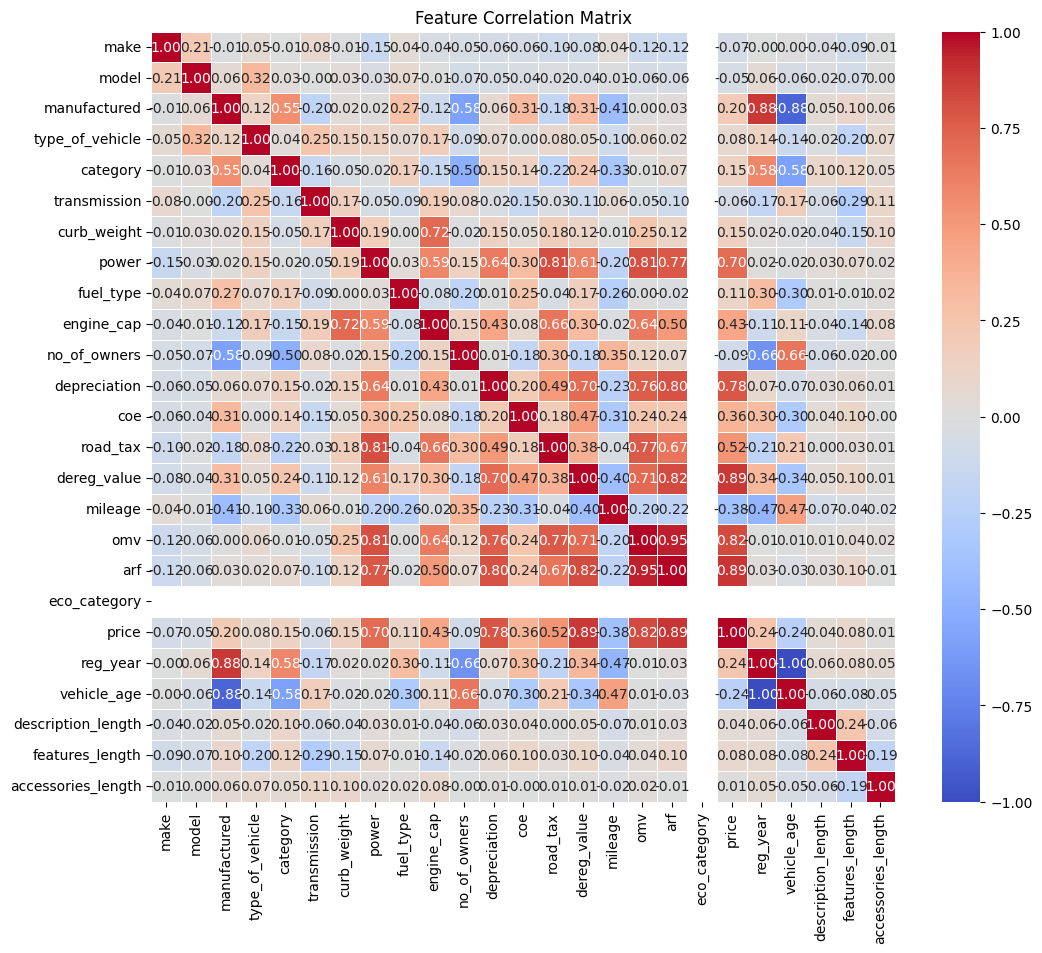

In [68]:
correlation_matrix = data_final.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()


In [86]:
X = data_final.drop(columns=['price'])
y = data_final['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model = RandomForestRegressor(**{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}
)
rf_model.fit(X_train, y_train)

y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

train_mse, test_mse, train_r2, test_r2

(np.float64(116023316.01681638),
 np.float64(728357398.2346305),
 0.9953777930440307,
 0.9646418293226617)

In [84]:

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

rf_model_tune = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf_model_tune, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_params


Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   2.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   3.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimat

/opt/homebrew/Caskroom/miniconda/base/envs/cs5228/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   2.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   3.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt

/opt/homebrew/Caskroom/miniconda/base/envs/cs5228/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
324 fits failed out of a total of 648.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
230 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniconda/base/envs/cs5228/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/Caskroom/miniconda/base/envs/cs5228/lib/python3.10/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/opt/homebrew/Caskroom/miniconda/base/envs/cs5228/lib/python3.10/si

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [87]:
res = rf_model.predict(data_test)

In [88]:
with open("predictions.csv", "w") as f:
    f.write("Id,Predicted\n")
    for i in range(len(res)):
        f.write(f"{i},{res[i]}\n")